<a href="https://colab.research.google.com/github/HWatanuki/Ocean_DeepLearning/blob/main/OceanDeepLearning_09_02_2021_HugoW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras #Importa a biblioteca Keras
from keras.datasets import mnist # Base de Dados MNIST
from tensorflow.python.keras import Sequential #Arquitetarura da rede neural
from tensorflow.python.keras.layers import Dense, Dropout #Neurônio (base da rede) e regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop #Otimizar (back propagation)

In [5]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [13]:
# Após importar os dados, é importante analisar o conteúdo do dataset e sua estrutura

print ("Quantidade de imagens para treino:", len(x_treino))

print ("Quantidade de imagens para teste:", len(x_teste))

print ("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("o que a imagem 0 representa:", representacao_primeira_imagem)

print("formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem.shape))

print (primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
o que a imagem 0 representa: 5
formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242

a imagem representa: 0


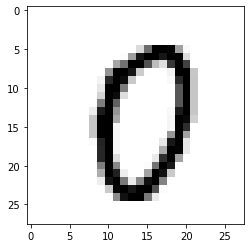

In [18]:
import matplotlib.pyplot as plt # Importar biblioteca de visualização

indice = 1000

print("a imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary) # plotar imagem em preto e branco

In [19]:
# Fluxo para construção de rede neural
# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões


In [25]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) #60000
quantidade_teste = len(x_teste) #10000

resolucao_imagem = x_treino[0].shape # (28.28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28*28=784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_test = x_teste.reshape(quantidade_teste, resolucao_total)

In [27]:
print ("quantidade de itens em x_treino_achatado[0]:", len(x_treino[0]))

#Como ficou x_treino_achatado[0]?

print(x_treino[0])

quantidade de itens em x_treino_achatado[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 2